In [1]:
# Speech Libraries
from python_speech_features import mfcc, get_filterbanks
from python_speech_features.sigproc import deframesig
from psf_supplement import specdecomp

## Wave libraries
from IPython.display import Audio
from IPython.display import display
import scipy.io.wavfile as wav

## Standard python libraries
import numpy as np
import sys
import matplotlib.pylab as plt
%matplotlib inline

In [6]:
audio_dir = "/data/fs4/datasets/magnolia/sisec/dev/"
fs, snda = wav.read(audio_dir+"dev_Ca1_Ce_A_src.wav")

# Normalize signal
snda = snda.astype('float64')
snda -= snda.mean()
snda /= np.sqrt( snda.var() )

# White noise
white_noise = np.random.randn(len(snda))

In [7]:
SNR = 0.05

snda *= np.sqrt(SNR)

print( 'Signal/Noise: ', SNR)
print( 'Signal power: ', snda.T @ snda / len(snda) ) 
print( 'Noise power : ', white_noise.T @ white_noise / len(white_noise ))

# Signal and Noise
total_sig = snda + white_noise
print( 'Empirical SNR: ', (snda.T @ snda) / (white_noise.T @ white_noise) )

Signal/Noise:  0.05
Signal power:  0.05
Noise power :  1.00407684819
Empirical SNR:  0.0497969852507


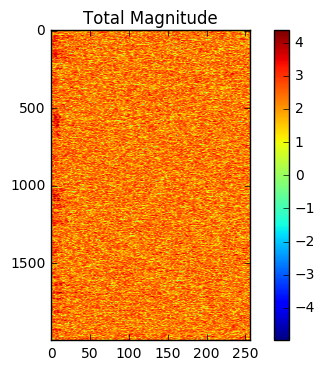

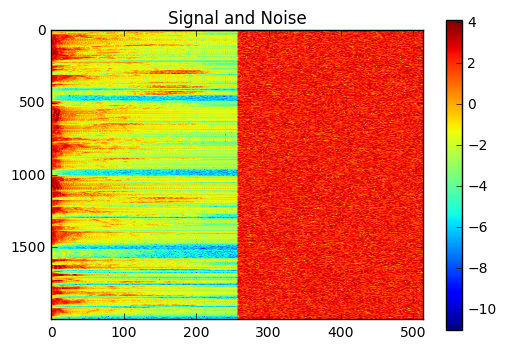

In [8]:
nfilt=64
numcep=64
nfft=512
winlen=0.01
winstep=0.005
ceplifter=0

snda_mag = specdecomp(snda,samplerate=fs,nfft=nfft,preemph=False,
                       winlen=winlen,winstep=winstep,decomp='abs')
noise_mag = specdecomp(white_noise,samplerate=fs,nfft=nfft,preemph=False,
                       winlen=winlen,winstep=winstep,decomp='abs')
total_mag = specdecomp(total_sig,samplerate=fs,nfft=nfft,preemph=False,
                       winlen=winlen,winstep=winstep,decomp='abs')

sum_mag = snda_mag + noise_mag
concat_mag = np.concatenate((snda_mag, noise_mag),axis=1)

plt.figure(); plt.imshow(np.log(total_mag), aspect=0.2); plt.colorbar(); plt.title('Total Magnitude')
plt.figure(); plt.imshow(np.log(concat_mag), aspect=0.2); plt.colorbar(); plt.title('Signal and Noise')

In [9]:
display(Audio(total_sig, rate=fs))

In [ ]:
snda.